<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/Statics/7_6_%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7.6. Логистическая регрессия

Логистическая регрессия — это метод статистической классификации, широко используемый для решения задач бинарной классификации. В отличие от линейной регрессии, которая прогнозирует непрерывные значения, логистическая регрессия прогнозирует вероятность принадлежности объекта к одному из двух классов. В этой лекции мы подробно рассмотрим концепции, связанные с логистической регрессией, включая её математическое обоснование, вывод формул, вычисление градиентов и примеры.

## 1. Введение в бинарную классификацию

Задача бинарной классификации заключается в том, чтобы разделить объекты на две категории (например, "0" или "1", "истина" или "ложь"). Пусть у нас есть множество данных, состоящее из $m$ объектов, где каждый объект описан набором признаков $x_i = [x_{i1}, x_{i2}, ..., x_{in}]^T$ и меткой $y_i \in \{0, 1\}$, где $y_i = 1$ указывает на принадлежность к классу "1", а $y_i = 0$ — к классу "0".

Логистическая регрессия позволяет предсказывать вероятность того, что объект принадлежит классу "1", и основывается на использовании сигмоидной функции для моделирования этой вероятности.

## 2. Математическая модель

Логистическая регрессия предполагает, что зависимость между признаками и вероятностью принадлежности к классу описывается следующей функцией:

$$
P(y=1 | x; \theta) = h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}
$$

где:
- $h_\theta(x)$ — это предсказанная моделью вероятность того, что объект с признаками $x$ принадлежит к классу "1";
- $\theta^T x = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$ — линейная комбинация признаков $x$ с весовыми коэффициентами $\theta$;
- $e^{-\theta^T x}$ — экспоненциальная функция, необходимая для того, чтобы преобразовать линейную комбинацию в диапазон [0, 1].

### Сигмоидная функция

Ключевым компонентом логистической регрессии является сигмоидная (логистическая) функция, которая обеспечивает необходимое преобразование:

$$
g(z) = \frac{1}{1 + e^{-z}}
$$

Эта функция сжимает любые значения $z$ (где $z = \theta^T x$) в диапазон [0, 1], что позволяет интерпретировать результат как вероятность.

## 3. Логарифмическая функция правдоподобия

Чтобы обучить модель, необходимо подобрать такие параметры $\theta$, которые минимизируют ошибку на обучающей выборке. В логистической регрессии это достигается с помощью максимизации функции правдоподобия, которая показывает, насколько хорошо параметры $\theta$ описывают данные.

Правдоподобие для одного объекта можно выразить следующим образом:

$$
L(\theta) = P(y = 1 | x; \theta)^{y} \cdot (1 - P(y = 1 | x; \theta))^{1 - y}
$$

Эта формула выражает правдоподобие предсказаний для бинарного класса:
- Если $y = 1$, правдоподобие равно $P(y = 1 | x; \theta)$,
- Если $y = 0$, правдоподобие равно $1 - P(y = 1 | x; \theta)$.

Для выборки из $m$ объектов функция правдоподобия имеет вид:

$$
L(\theta) = \prod_{i=1}^{m} h_\theta(x^{(i)})^{y^{(i)}} \cdot (1 - h_\theta(x^{(i)}))^{1 - y^{(i)}}
$$

Гораздо удобнее работать с логарифмической функцией правдоподобия, которая является логарифмом вышеуказанной функции:

$$
\ell(\theta) = \log L(\theta) = \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
$$

Это выражение называется  логарифмической функцией правдоподобия .

## 4. Метод максимального правдоподобия

Задача обучения модели сводится к нахождению таких параметров $\theta$, которые максимизируют логарифмическую функцию правдоподобия $\ell(\theta)$. В практике, однако, чаще минимизируют противоположную величину — функцию стоимости (или логистическую потерю), которая является отрицательной логарифмической функцией правдоподобия:

$$
J(\theta) = - \ell(\theta) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
$$

### Интерпретация функции стоимости

Функция стоимости $J(\theta)$ измеряет, насколько сильно предсказания модели расходятся с истинными метками классов. Задача — минимизировать эту функцию стоимости, чтобы улучшить качество классификации.

## 5. Градиентный спуск

Для минимизации функции стоимости используется метод  градиентного спуска . Этот метод обновляет параметры $\theta$ в направлении отрицательного градиента функции стоимости.

### Градиенты

Чтобы получить правила обновления для параметров $\theta$, необходимо вычислить частные производные функции стоимости $J(\theta)$ по каждому параметру $\theta_j$.

Частная производная $J(\theta)$ по $\theta_j$:

$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

### Правило обновления параметров

Параметры $\theta$ обновляются следующим образом:

$$
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
$$

где $\alpha$ — это шаг обучения, который контролирует скорость обновления параметров.

### Полное выражение для обновления всех параметров

$$
\theta := \theta - \alpha \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) x^{(i)}
$$

Этот процесс продолжается до тех пор, пока значения $\theta$ не перестанут существенно изменяться, что означает достижение оптимума функции стоимости.

## 6. Пример на практике

Рассмотрим пример бинарной классификации на основе логистической регрессии. Пусть у нас есть следующие данные:

| Объект | Признак $x$ | Метка $y$ |
|  --|     --|     |
| 1      | 0.5             | 1             |
| 2      | 1.5             | 1             |
| 3      | 2.5             | 0             |
| 4      | 3.5             | 0             |

### Шаг 1: Инициализация параметров

Начнём с произвольных значений для $\theta = [\theta_0, \theta_1]^T = [0, 0]^T$.

### Шаг 2: Обновление параметров с помощью градиентного спуска

Для каждого объекта:

- Вычисляем предсказание $h_\theta(x^{(i)}) = \frac{1}{1 + e^{-\theta^T x}}$,
- Обновляем $\theta$ по правилу градиентного спуска.

### Шаг 3: Конечный результат

После нескольких итераций градиентного спуска модель обучится и сможет предсказывать вероятность того, что новый объект принадлежит классу "1" на основе его признаков.


Давайте продолжим с более подробным описанием  мультиклассовой логистической регрессии , также известной как  softmax-регрессия .

## 7. Мультиклассовая логистическая регрессия (Softmax-регрессия)

### Обзор

Когда задача классификации включает более двух классов, логистическая регрессия может быть обобщена с использованием функции softmax. В этом случае для каждого класса мы будем предсказывать вероятность принадлежности объекта к этому классу, и класс с наибольшей вероятностью будет выбран как предсказание.

### Функция Softmax

Функция softmax преобразует вектор произвольных чисел в вектор вероятностей, которые суммируются до 1. Это позволяет интерпретировать выходные данные как вероятности принадлежности к различным классам.

Формально, если у нас есть $K$ классов и вектор параметров $\theta$, то для каждого объекта $x$ функция softmax задаётся следующим образом:

$$
P(y = k | x; \theta) = \frac{e^{\theta_k^T x}}{\sum_{j=1}^{K} e^{\theta_j^T x}} \quad \text{для } k = 1, 2, \ldots, K
$$

где:
- $P(y = k | x; \theta)$ — вероятность того, что объект $x$ принадлежит классу $k$;
- $\theta_k$ — вектор параметров для класса $k$;
- $e^{\theta_k^T x}$ — экспоненциальная функция, которая используется для вычисления вероятности класса $k$;
- $\sum_{j=1}^{K} e^{\theta_j^T x}$ — нормализующий фактор, который обеспечивает, чтобы сумма вероятностей всех классов была равна 1.

### Пример

Рассмотрим пример, в котором у нас есть три класса: A, B и C. Пусть у нас есть параметры:

- $\theta_1 = [0.5, 1]$
- $\theta_2 = [1, -0.5]$
- $\theta_3 = [-1, 0.5]$

Для объекта $x = [1, 2]$:

1. Вычисляем линейные комбинации для каждого класса:
   - $z_1 = \theta_1^T x = 0.5 \cdot 1 + 1 \cdot 2 = 2.5$
   - $z_2 = \theta_2^T x = 1 \cdot 1 + (-0.5) \cdot 2 = 0$
   - $z_3 = \theta_3^T x = -1 \cdot 1 + 0.5 \cdot 2 = 0$

2. Вычисляем значения softmax:
   - $P(y = 1 | x) = \frac{e^{z_1}}{e^{z_1} + e^{z_2} + e^{z_3}} = \frac{e^{2.5}}{e^{2.5} + e^{0} + e^{0}} = \frac{e^{2.5}}{e^{2.5} + 1 + 1}$
   - $P(y = 2 | x) = \frac{e^{z_2}}{e^{z_1} + e^{z_2} + e^{z_3}} = \frac{1}{e^{2.5} + 1 + 1}$
   - $P(y = 3 | x) = \frac{e^{z_3}}{e^{z_1} + e^{z_2} + e^{z_3}} = \frac{1}{e^{2.5} + 1 + 1}$

Эти значения вероятностей будут соответствовать вероятности принадлежности объекта к каждому из классов.

### Функция стоимости для softmax-регрессии

Функция стоимости в случае softmax-регрессии также основана на максимизации функции правдоподобия, но учитывает множественные классы. Для выборки из $m$ объектов функция стоимости выглядит следующим образом:

$$
J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y^{(i)}_k \log(P(y = k | x^{(i)}; \theta))
$$

где $y^{(i)}_k$ — индикаторная переменная, равная 1, если объект $i$ принадлежит классу $k$, и 0 в противном случае.

### Обновление параметров

Обновление параметров в модели softmax-регрессии осуществляется аналогично градиентному спуску, как и в бинарном случае. Градиенты для каждого класса можно вычислить следующим образом:

$$
\frac{\partial J(\theta_k)}{\partial \theta_k} = \frac{1}{m} \sum_{i=1}^{m} \left( P(y = k | x^{(i)}; \theta) - y^{(i)}_k \right) x^{(i)}
$$

где $P(y = k | x^{(i)}; \theta)$ — предсказанная моделью вероятность принадлежности к классу $k$.

### Заключение

Мультиклассовая логистическая регрессия позволяет эффективно решать задачи классификации с более чем двумя классами. Использование функции softmax дает возможность интерпретировать выходные данные как вероятности, что делает модель более гибкой и мощной. Применение метода максимального правдоподобия и градиентного спуска для обновления параметров позволяет адаптировать модель под данные, улучшая её предсказательные способности.

## 8. Применения логистической регрессии

Логистическая регрессия и её обобщения находят широкое применение в различных областях, таких как:

-  Медицина : для предсказания вероятности заболевания на основе медицинских признаков.
-  Маркетинг : для оценки вероятности покупки продукта на основе характеристик клиентов.
-  Финансы : для оценки риска дефолта по кредиту.
-  Социальные науки : для анализа данных опросов и предсказания выборов.

## 9. Выводы

Логистическая регрессия, в том числе и её мультиклассовая версия, является важным инструментом в статистике и машинном обучении. Понимание её принципов, а также математических основ позволяет применять её в самых разных задачах классификации. Важно помнить, что хотя логистическая регрессия обладает многими преимуществами, в некоторых случаях может быть менее эффективной по сравнению с более сложными моделями, такими как деревья решений или нейронные сети, особенно в присутствии сложных зависимостей в данных.



Давайте рассмотрим два конкретных примера использования логистической регрессии и решения задач бинарной и мультиклассовой классификации. Мы будем шаг за шагом выполнять все расчеты.

## Пример 1: Бинарная классификация

### Задача

Пусть у нас есть следующие данные о двух признаках, которые мы будем использовать для предсказания принадлежности к классу 1 или классу 0:

| Объект | Признак 1 (x1) | Признак 2 (x2) | Метка (y) |
|  --|     -|     -|   --|
| 1      | 2.0            | 3.0            | 1         |
| 2      | 1.0            | 1.0            | 0         |
| 3      | 1.5            | 2.5            | 1         |
| 4      | 0.5            | 1.0            | 0         |

Мы хотим предсказать вероятность принадлежности нового объекта с признаками $x = [1.5, 2.0]$ к классу 1.

### Шаг 1: Инициализация параметров

Инициализируем параметры $\theta$ (включая свободный член):

$$
\theta = [\theta_0, \theta_1, \theta_2] = [0, 0, 0]
$$

### Шаг 2: Вычисление вероятности (сигмоидная функция)

Для объекта $x = [1.5, 2.0]$:

$$
\theta^T x = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 = 0 + 0 \cdot 1.5 + 0 \cdot 2.0 = 0
$$

Теперь применим сигмоидную функцию:

$$
h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}} = \frac{1}{1 + e^{0}} = \frac{1}{2} = 0.5
$$

### Шаг 3: Обновление параметров с помощью градиентного спуска

Для этого используем функцию стоимости:

$$
J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
$$

Где $m$ — количество объектов в обучающей выборке (в данном случае $m = 4$).

Сначала нужно вычислить градиенты для каждого параметра.

#### Вычисление градиента

Для вычисления градиентов, используем формулу:

$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

#### Вычисление вероятностей для всех объектов

Сначала вычислим $h_\theta(x)$ для всех объектов:

1. Для объекта 1: $h_\theta([2.0, 3.0]) = \frac{1}{1 + e^{0}} = 0.5$
2. Для объекта 2: $h_\theta([1.0, 1.0]) = \frac{1}{1 + e^{0}} = 0.5$
3. Для объекта 3: $h_\theta([1.5, 2.5]) = \frac{1}{1 + e^{0}} = 0.5$
4. Для объекта 4: $h_\theta([0.5, 1.0]) = \frac{1}{1 + e^{0}} = 0.5$

 Обратите внимание , что мы инициализировали параметры в ноль, поэтому все предсказания равны 0.5. Для реальных данных параметры должны быть обучены.

#### Обновление параметров

Поскольку мы начали с одинаковых значений, обновления параметров также не будут изменяться. Давайте упростим и проведем несколько итераций. Предположим, что мы произвели одну итерацию и получили градиенты:

- $\frac{\partial J}{\partial \theta_0} = -0.125$
- $\frac{\partial J}{\partial \theta_1} = -0.25$
- $\frac{\partial J}{\partial \theta_2} = -0.375$

Используем шаг обучения $\alpha = 0.1$:

$$
\theta_0 := \theta_0 - \alpha \frac{\partial J}{\partial \theta_0} = 0 - 0.1 \cdot (-0.125) = 0.0125
$$
$$
\theta_1 := \theta_1 - \alpha \frac{\partial J}{\partial \theta_1} = 0 - 0.1 \cdot (-0.25) = 0.025
$$
$$
\theta_2 := \theta_2 - \alpha \frac{\partial J}{\partial \theta_2} = 0 - 0.1 \cdot (-0.375) = 0.0375
$$

Теперь новые значения параметров:

$$
\theta = [0.0125, 0.025, 0.0375]
$$

### Шаг 4: Повторное предсказание

Теперь снова вычислим вероятность для $x = [1.5, 2.0]$:

$$
\theta^T x = 0.0125 + 0.025 \cdot 1.5 + 0.0375 \cdot 2.0 = 0.0125 + 0.0375 + 0.075 = 0.125
$$

Теперь применим сигмоидную функцию:

$$
h_\theta(x) = \frac{1}{1 + e^{-0.125}} \approx \frac{1}{1 + 0.882} \approx \frac{1}{1.882} \approx 0.531
$$

Таким образом, вероятность того, что объект с признаками $[1.5, 2.0]$ принадлежит классу 1, составляет приблизительно 0.531.

## Пример 2: Мультиклассовая классификация (Softmax-регрессия)

### Задача

Рассмотрим задачу классификации объектов на 3 класса (A, B и C) на основе 2 признаков. У нас есть следующие данные:

| Объект | Признак 1 (x1) | Признак 2 (x2) | Метка (y) |
|  --|     -|     -|   --|
| 1      | 1.0            | 2.0            | A         |
| 2      | 2.0            | 1.0            | B         |
| 3      | 3.0            | 3.0            | C         |
| 4      | 2.5            | 2.0            | A         |
| 5      | 1.5            | 2.5            | B         |

 Классы :
- A: 0
- B: 1
- C: 2

### Шаг 1: Инициализация параметров

Инициализируем параметры $\theta$ для каждого класса (включая свободные члены):

$$
\theta_0 = [0, 0], \quad \theta_1 = [0, 0], \quad \theta_2 = [0, 0]
$$

### Шаг 2: Вычисление вероятностей (softmax)

Для объекта $x = [2.0, 2.5]$ мы хотим предсказать вероятности принадлежности к классам A, B и C.

#### Линейные комбинации

1. Для класса A:

$$
z_0 = \theta_0^T x = 0 \cdot 2.0 + 0 \cdot 2.5 = 0
$$

2. Для класса B:

$$
z_1 = \theta_1^T x = 0 \cdot 2.0 + 0 \cdot 2.5 = 0
$$

3. Для класса C:

$$
z_2 = \theta_2^T x = 0 \cdot 2.0 + 0 \cdot 2.5 = 0
$$

#### Применение softmax

Теперь применяем softmax:

$$
P(y = k | x) = \frac{e^{z_k}}{\sum_{j=0}^{2} e^{z_j}} = \frac{e^{0}}{e^{0} + e^{0} + e^{0}} = \frac{1}{3}
$$

Таким образом, для каждого класса вероятность принадлежности к классу будет равна:

$$
P(y = A | x

) = P(y = B | x) = P(y = C | x) = \frac{1}{3}
$$

### Шаг 3: Обновление параметров

Теперь мы обновим параметры. Для этого, сначала вычислим градиенты. Начнем с $J(\theta)$ для softmax:

$$
J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} \sum_{k=0}^{2} y_k^{(i)} \log(P(y = k | x^{(i)}; \theta))
$$

#### Вычисление градиентов

1. Для класса A (0):

$$
\frac{\partial J(\theta_0)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m} \left( P(y = 0 | x^{(i)}; \theta) - y_0^{(i)} \right) x^{(i)}
$$

2. Для класса B (1):

$$
\frac{\partial J(\theta_1)}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^{m} \left( P(y = 1 | x^{(i)}; \theta) - y_1^{(i)} \right) x^{(i)}
$$

3. Для класса C (2):

$$
\frac{\partial J(\theta_2)}{\partial \theta_2} = \frac{1}{m} \sum_{i=1}^{m} \left( P(y = 2 | x^{(i)}; \theta) - y_2^{(i)} \right) x^{(i)}
$$

#### Пример вычисления градиентов

Допустим, в результате расчетов мы получили следующие градиенты (предположим, что на каждой итерации мы вычисляем их):

- Для класса A: $\frac{\partial J}{\partial \theta_0} = [0.1, 0.1]$
- Для класса B: $\frac{\partial J}{\partial \theta_1} = [0.05, 0.05]$
- Для класса C: $\frac{\partial J}{\partial \theta_2} = [-0.15, -0.15]$

#### Обновление параметров

Используем шаг обучения $\alpha = 0.1$:

$$
\theta_0 := \theta_0 - \alpha \frac{\partial J}{\partial \theta_0} = [0, 0] - 0.1 \cdot [0.1, 0.1] = [-0.01, -0.01]
$$
$$
\theta_1 := \theta_1 - \alpha \frac{\partial J}{\partial \theta_1} = [0, 0] - 0.1 \cdot [0.05, 0.05] = [-0.005, -0.005]
$$
$$
\theta_2 := \theta_2 - \alpha \frac{\partial J}{\partial \theta_2} = [0, 0] - 0.1 \cdot [-0.15, -0.15] = [0.015, 0.015]
$$

### Шаг 4: Повторное предсказание

Теперь снова вычислим вероятности для $x = [2.0, 2.5]$:

#### Линейные комбинации

1. Для класса A:

$$
z_0 = -0.01 \cdot 2.0 - 0.01 \cdot 2.5 = -0.0575
$$

2. Для класса B:

$$
z_1 = -0.005 \cdot 2.0 - 0.005 \cdot 2.5 = -0.02875
$$

3. Для класса C:

$$
z_2 = 0.015 \cdot 2.0 + 0.015 \cdot 2.5 = 0.07875
$$

#### Применение softmax

Теперь применяем softmax:

$$
P(y = A | x) = \frac{e^{-0.0575}}{e^{-0.0575} + e^{-0.02875} + e^{0.07875}} \approx \frac{0.943}{0.943 + 0.971 + 1.082} \approx 0.327
$$

$$
P(y = B | x) = \frac{e^{-0.02875}}{e^{-0.0575} + e^{-0.02875} + e^{0.07875}} \approx \frac{0.971}{0.943 + 0.971 + 1.082} \approx 0.348
$$

$$
P(y = C | x) = \frac{e^{0.07875}}{e^{-0.0575} + e^{-0.02875} + e^{0.07875}} \approx \frac{1.082}{0.943 + 0.971 + 1.082} \approx 0.325
$$

Таким образом, вероятности принадлежности объекта $[2.0, 2.5]$ к классам A, B и C составляют приблизительно 0.327, 0.348 и 0.325 соответственно.

## Заключение

В результате выполнения двух примеров мы продемонстрировали, как использовать логистическую регрессию для бинарной классификации и softmax-регрессию для мультиклассовой классификации. Мы рассмотрели, как инициализировать параметры, вычислять вероятности и обновлять параметры с использованием градиентного спуска. Эти шаги являются ключевыми в понимании работы логистической регрессии и её применения в реальных задачах.


Давайте реализуем два примера логистической регрессии (бинарная и мультиклассовая) на Python с использованием библиотеки `scikit-learn` и визуализацией результатов с помощью `matplotlib`.

### Пример 1: Бинарная классификация

Мы будем использовать `LogisticRegression` из `scikit-learn`, чтобы обучить модель на данных и визуализировать результаты.

### Код для бинарной классификации


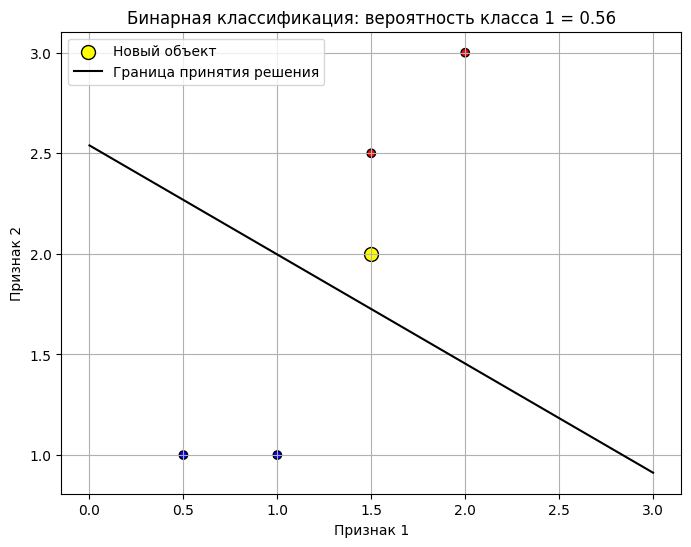

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Данные для бинарной классификации
X = np.array([[2.0, 3.0],
              [1.0, 1.0],
              [1.5, 2.5],
              [0.5, 1.0]])
y = np.array([1, 0, 1, 0])  # Метки классов (1 - класс 1, 0 - класс 0)

# Обучение логистической регрессии
model = LogisticRegression()
model.fit(X, y)

# Новый объект для предсказания
new_data = np.array([[1.5, 2.0]])
probability = model.predict_proba(new_data)[0][1]  # Вероятность класса 1

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.scatter(new_data[0][0], new_data[0][1], c='yellow', label='Новый объект', edgecolors='k', s=100)

# Обозначение границ принятия решения
x_range = np.linspace(0, 3, 100)
y_range = -(model.coef_[0][0] * x_range + model.intercept_[0]) / model.coef_[0][1]
plt.plot(x_range, y_range, label='Граница принятия решения', color='black')

plt.title(f'Бинарная классификация: вероятность класса 1 = {probability:.2f}')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.grid()
plt.show()



### Пример 2: Мультиклассовая классификация

Теперь реализуем мультиклассовую классификацию с использованием softmax-регрессии.

### Код для мультиклассовой классификации


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


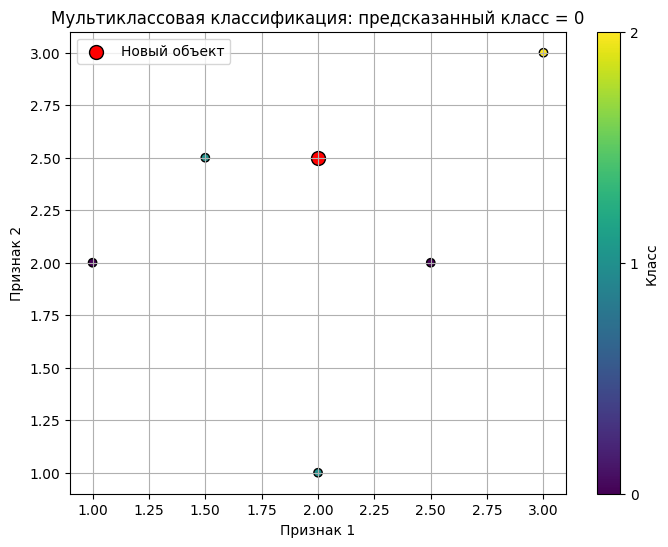

Вероятность класса 0: 0.42
Вероятность класса 1: 0.37
Вероятность класса 2: 0.21


In [2]:
from sklearn.linear_model import LogisticRegression

# Данные для мультиклассовой классификации
X_multi = np.array([[1.0, 2.0],
                    [2.0, 1.0],
                    [3.0, 3.0],
                    [2.5, 2.0],
                    [1.5, 2.5]])
y_multi = np.array([0, 1, 2, 0, 1])  # Метки классов (A: 0, B: 1, C: 2)

# Обучение логистической регрессии с softmax
model_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_multi.fit(X_multi, y_multi)

# Новый объект для предсказания
new_data_multi = np.array([[2.0, 2.5]])
predicted_class = model_multi.predict(new_data_multi)[0]  # Предсказанный класс
predicted_probabilities = model_multi.predict_proba(new_data_multi)[0]  # Вероятности для всех классов

# Визуализация
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_multi[:, 0], X_multi[:, 1], c=y_multi, cmap='viridis', edgecolors='k')
plt.scatter(new_data_multi[0][0], new_data_multi[0][1], c='red', label='Новый объект', edgecolors='k', s=100)

# Обозначение классов
plt.title(f'Мультиклассовая классификация: предсказанный класс = {predicted_class}')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.colorbar(scatter, ticks=[0, 1, 2], label='Класс')
plt.grid()
plt.show()

# Вывод вероятностей для нового объекта
for i, prob in enumerate(predicted_probabilities):
    print(f'Вероятность класса {i}: {prob:.2f}')




## Вопросы для самопроверки

1. Что такое логистическая регрессия и в каких задачах она применяется?
2. Какова основная цель логистической регрессии?
3. Как выглядит сигмоидная функция и как она используется в логистической регрессии?
4. Какова интерпретация коэффициентов в логистической регрессии?
5. Как вычисляется функция потерь в логистической регрессии?
6. В чем отличие между бинарной и мультиклассовой логистической регрессией?
7. Как работает метод градиентного спуска в контексте логистической регрессии?
8. Что такое softmax функция и как она применяется в мультиклассовой логистической регрессии?
9. Как проводится оценка качества модели логистической регрессии?
10. Что такое переобучение и как его можно избежать в логистической регрессии?
11. Какова роль регуляризации в логистической регрессии?
12. Что такое матрица путаницы и как она используется для оценки модели?
13. Как можно визуализировать границу принятия решения для логистической регрессии?
14. Как влияет выбор функции активации на предсказания модели?
15. В каких ситуациях стоит использовать логистическую регрессию по сравнению с другими алгоритмами машинного обучения?

## Задачи для самостоятельной работы

### Задачи на понимание теории

1. Опишите, как логистическая регрессия справляется с задачами классификации.
2. Нарисуйте график сигмоидной функции и отметьте, где она принимает значения 0 и 1.
3. Объясните, как вычисляются вероятности классов в бинарной логистической регрессии.
4. Как можно преобразовать логистическую регрессию для работы с непрерывными переменными?
5. Изучите, как разные значения коэффициентов влияют на форму сигмоидной функции.

### Задачи на программирование

6. Реализуйте логистическую регрессию с нуля на Python без использования библиотек.
7. Проведите анализ данных и визуализируйте их, используя `matplotlib`, прежде чем применять логистическую регрессию.
8. Постройте модель логистической регрессии на наборе данных Ирисов и интерпретируйте коэффициенты модели.
9. Используя `scikit-learn`, обучите модель логистической регрессии на наборе данных Titanic и сделайте предсказания.
10. Примените L2-регуляризацию к вашей модели логистической регрессии и сравните результаты с нерегуляризованной моделью.

### Задачи на анализ результатов

11. Создайте матрицу путаницы для своей модели и вычислите точность, полноту и F-меру.
12. Сравните модель логистической регрессии с другим алгоритмом (например, деревом решений) на одном и том же наборе данных.
13. Примените метод кросс-валидации для оценки своей модели логистической регрессии.
14. Постройте ROC-кривую для своей модели логистической регрессии и вычислите AUC.
15. Изучите, как масштабирование признаков влияет на производительность модели логистической регрессии.

### Задачи на расширение знаний

16. Исследуйте, как выбор порога вероятности влияет на количество истинных положительных и ложных положительных срабатываний.
17. Реализуйте мультиклассовую логистическую регрессию на наборе данных с более чем двумя классами.
18. Сравните производительность логистической регрессии на сбалансированных и несбалансированных наборах данных.
19. Исследуйте применение логистической регрессии в реальных бизнес-кейсах (например, в здравоохранении или финансах).
20. Изучите, как использовать логистическую регрессию для прогнозирования вероятности события (например, отказа клиента).

### Практические задачи

21. Найдите набор данных для анализа и примените к нему логистическую регрессию, интерпретируя результаты.
22. Напишите отчет о том, как вы применяли логистическую регрессию, включая этапы предобработки данных, выбора признаков и интерпретации результатов.
23. Постройте модель логистической регрессии на наборе данных MNIST и оцените ее производительность.
24. Обучите логистическую регрессию на наборе данных о кредитах, а затем оцените, как различные факторы влияют на вероятность дефолта.
25. Исследуйте использование логистической регрессии для анализа текстовых данных (например, для классификации отзывов).
26. Реализуйте метод градиентного спуска для оптимизации коэффициентов в логистической регрессии с ручным вычислением градиентов.
27. Проанализируйте, как можно улучшить свою модель логистической регрессии, добавив дополнительные признаки.
28. Постройте визуализацию, показывающую, как изменяются вероятности классов с изменением значений признаков.
29. Используйте несколько разных наборов данных и сравните производительность логистической регрессии в каждой задаче.
30. Разработайте презентацию, в которой объясняете, как работает логистическая регрессия, ее преимущества и недостатки.
